In [8]:
%pylab inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

from datetime import date
import datetime
import time

from moudle.pre_process import *
from moudle.segment import *

import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

Populating the interactive namespace from numpy and matplotlib


read from applications.json

In [9]:
src_data=open("data/applications.json")
corpus=src_data.read().replace('}{', '}|{').split('|')


In [10]:
def job_clean(name):
    if name:
        if len(name)>10:
            return 'trash'
        if u'专场' in name:
            return "fair"
        if u'管理培训生' in name:
            return u"管培生"       
        new_name=name.split("-")[0]  
        new_name=new_name.split(u"、")[0]  
        new_name=new_name.split(u"丨")[0]        
        new_name=new_name.split(u"（")[0] 
        new_name=new_name.split(u"/")[0] 

        return new_name
    else:
        return 


In [11]:

cate_num=1000
cate_list=[]
cate_series=[]
for item in corpus[:cate_num]:   
    vec=apply_vec(item)
    if vec:
        if vec[0]:
            pass
        if vec[1]:
            cate_list.append(vec[1][2])
# for idx,cate in  enumerate(cate_list):
#     print idx
#     print cate

# plt.hist(cate_list,facecolor='blue', alpha=0.5)

In [12]:
apply_list=[]
name_list=[]

for item in corpus[:-1]:   
    vec=apply_vec(item)
    if vec:
        if vec[0]:
            pass
        if vec[1]:
            name_list.append(job_clean(vec[1][1]))

            


In [13]:
tags=name_tag(name_list,K=30)
for tag in tags:
    print tag

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
Loading model cost 0.699 seconds.
DEBUG:jieba:Loading model cost 0.699 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


trash
项目经理
fair
管培生
SMT
财务
并购
投后
BD
专员
规划师
客户经理
投资者
初级
销售
总裁
分析员
精解
投资人
私募
干货
见习
FA
量化
业务人员
商行
投资部
Analyst
资深
A股


In [14]:

stop_words=u"实习生|实习|经理|资深|专员|暑期|团队|高级|行业|执行|总裁|初级|经理助理|总监|助理|分析师|intern|业务人员|投资银行|投资者|财务分析师|顾问|研究员|项目经理|投资经理"

tags=name_tag(name_list,K=50)
print len(tags)
for word in stop_words.split("|"):

    if word in tags:
        tags.remove(word)
        

print len(tags)

50
42


9902
9902


(array([ 8356.,   205.,   132.,   129.,   130.,    51.,   111.,    85.,
           33.,    56.,    55.,    38.,    64.,    33.,    58.,    23.,
           52.,    28.,    37.,    18.,    39.,    15.,    15.,    30.,
           35.,    14.,    29.,    31.]),
 array([ -1. ,   0.5,   2. ,   3.5,   5. ,   6.5,   8. ,   9.5,  11. ,
         12.5,  14. ,  15.5,  17. ,  18.5,  20. ,  21.5,  23. ,  24.5,
         26. ,  27.5,  29. ,  30.5,  32. ,  33.5,  35. ,  36.5,  38. ,
         39.5,  41. ]),
 <a list of 28 Patch objects>)

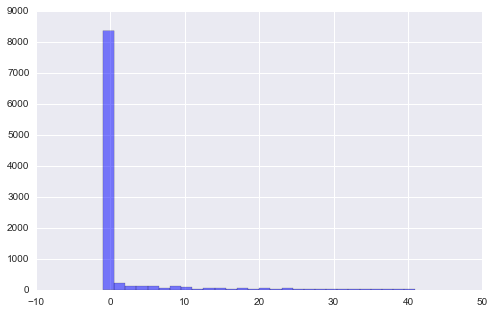

In [15]:



name_taged={}
for app_id,name in enumerate(name_list):
    for idx,tag in  enumerate(tags):
        if tag in name:
            name_taged[app_id]=idx
    if not app_id in name_taged:
        name_taged[app_id]=-1

   
print len(name_list)
print len(name_taged)
plt.hist(name_taged.values(),bins=28,facecolor='blue', alpha=0.5)

In [16]:

for idx,tag in enumerate(tags):
    print idx,tag


0 trash
1 fair
2 管培生
3 SMT
4 财务
5 并购
6 投后
7 BD
8 规划师
9 客户经理
10 销售
11 分析员
12 精解
13 投资人
14 私募
15 干货
16 见习
17 FA
18 量化
19 商行
20 投资部
21 Analyst
22 A股
23 投行部
24 策略
25 评审
26 PE
27 structurer
28 IBD
29 VC
30 市场推广
31 猎头
32 CEO
33 客服
34 营销
35 行研
36 配置
37 事业部
38 理财师
39 在线
40 人事
41 信用


In [17]:
def map_city(city):
    if len(city) >2:
        return city[:2]
    else:
        return city   
def map_age(age):
    if age:
        return 1
    return 0



In [18]:
def map_status(status):
    if status in ['invited']:#'read',,'interviewed'#best:'invited'
        return 1
    else:
        return 0



application_pd=pd.DataFrame(application_list)
application_pd[9]=application_pd[9].map(lambda x:map_status(x))
application_pd[0] = application_pd[0].map( {u'男': 0, u'女': 1} )
application_pd[2] = application_pd[2].map( lambda x:x/5)
application_pd[3] = application_pd[3].map( lambda x:x/5)
application_pd[1]=application_pd[1].map(lambda x:map_age(x))
application_pd=application_pd.drop(4,axis=1)
application_pd=application_pd.drop(2,axis=1)
application_pd=application_pd.dropna()




NameError: name 'application_list' is not defined

In [ ]:

# result=application_pd.values[:,8]
# age=application_pd.values[:,2]
# age_invited=age[result==1]
# age_uninvited=age[result==0]

# plt.hist(age_uninvited,facecolor='blue', alpha=0.5)
# plt.hist(age_invited,facecolor='green', alpha=0.5)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


train_data = application_pd.values

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,:-1], train_data[0::,-1] )




clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit( train_data[0::,:-1], train_data[0::,-1] )
from sklearn import cross_validation

clf_scores = cross_validation.cross_val_score(clf,train_data[0::,:-1], train_data[0::,-1],cv=10)#.mean()
print clf_scores.mean()    

forest_scores = cross_validation.cross_val_score(forest,train_data[0::,:-1], train_data[0::,-1],cv=5)#.mean()
print forest_scores.mean()   

In [ ]:

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
y_true = train_data[0::,-1]

y_scores = forest.predict_proba(train_data[0::,:-1])

precision, recall, thresholds = precision_recall_curve(y_true, y_scores[0::,1])


# plt.plot( recall,precision)
# rint metrics.auc(recall,precision)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores[0::,1])
plt.plot( fpr, tpr)
print metrics.auc(fpr, tpr)
forest.score(train_data[0::,:-1],y_true)

In [ ]:
y_scores = clf.predict_proba(train_data[0::,:-1])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores[0::,1])
# plt.plot( recall,precision)
print metrics.auc(recall,precision)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores[0::,1])
# plt.plot( fpr, tpr)
print metrics.auc(fpr, tpr)
clf.score(train_data[0::,:-1],y_true)

In [ ]:
# print metrics.auc(precision, recall)
print sum(y_true )
print len(y_true )
print 1-float(sum(y_true))/len(y_true )

In [ ]:

position_set=set()
position_num=20000
dutys=[]

for item in corpus[:position_num]:
    position=position_vec(item)
    if position:
        if not position[0] in position_set:
            dutys.append(position[3])
            position_set.add(position[0])
            
            
print str(len(position_set))+'/'+str(position_num)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


vectorizer = TfidfVectorizer(min_df=0.01,max_df=0.3, decode_error='ignore')
X = vectorizer.fit_transform(duty_seg)
X=X.toarray()

print X.shape
print len(duty_seg)

In [ ]:
# dictionary=corpora.Dictionary(duty_seg)
# duty_corpus = [dictionary.doc2bow(seg) for seg in duty_seg]

# tfidf = models.TfidfModel(duty_corpus)
# duty_tfidf = tfidf[duty_corpus]
# lsi = models.LsiModel(duty_tfidf, id2word=dictionary, num_topics=5)
# corpus_lsi = lsi[duty_tfidf]
# for doc in corpus_lsi:
#     print doc



In [ ]:
# idx=(km.labels_==0).nonzero()[0]
# for i in list(idx):
#     print i
#     print dutys[i]


In [ ]:
resume_cnt=100
resume_list=[]
resume_set=set()
for item in corpus[:resume_cnt]:
    resume=resume_vec(item)
    if not resume[0] in resume_set:
        resume_set.add(resume[0])
        resume_list.append(resume)

print str(len(resume_set))+'/'+str(resume_cnt)

In [ ]:

duty_seg=[]

for duty in dutys:
    duty_seg.append(text_segment(duty))
    


